***1.A. Using a automaton and a CFG (context-free grammar) implemented by me reconstruct two sentences.*** <br>
Sentence1 : Hope you too, to enjoy it as my deepest wishes. <br> Sentence2: I got this message to see the approved message.

In [1]:
import nltk
# simple Context free grammar 
grammar = nltk.CFG.fromstring("""
    S -> NP VP | VP
    NP -> PRONOUN |DET N | DET ADJ N | PRONOUN N |PRONOUN ADJ N
    VP -> V NP | V | V INF | V NP INF | V PP | V NP PP
    PP -> PREP NP
    INF -> 'to' V | 'to' V NP                                                            
    DET -> 'the' | 'a' | 'this'
    PRONOUN -> 'I' | 'you' | 'my'
    ADJ -> 'deepest' | 'approved'
    N -> 'message' | 'wishes'
    V -> 'hope' | 'enjoy' | 'got' | 'see'
    PREP -> 'to'
""")
 

parser = nltk.ChartParser(grammar)

sentences = [
    ["hope", "you","to", "enjoy", "my", "deepest", "wishes"],
    ["I","got","this","message","to","see","the","approved","message"]
]

for sentence in sentences:
    print(f"\nPrinting tree for sencence: :{' '.join(sentence)}")
    for tree in parser.parse(sentence):
        try:
            tree.pretty_print() 
        except Exception as e:
            print(f"Could not parse sentence: {e}")



Printing tree for sencence: :hope you to enjoy my deepest wishes
                   S                         
                   |                          
                   VP                        
  _________________|______                    
 |      |                INF                 
 |      |      ___________|_______            
 |      NP    |    |              NP         
 |      |     |    |       _______|______     
 V   PRONOUN  |    V   PRONOUN   ADJ     N   
 |      |     |    |      |       |      |    
hope   you    to enjoy    my   deepest wishes


Printing tree for sencence: :I got this message to see the approved message
             S                                           
    _________|________________                            
   |                          VP                         
   |      ____________________|_______                    
   |     |        |                  INF                 
   |     |        |            _______|_____         

***1.B Recreate both paragraphs using 3 different python pipelines*** <br>

In [2]:
paragraphs=['''
During our final discuss, I told him about the new submission — the one we were waiting since  
last autumn, but the updates was confusing as it not included the full feedback from reviewer or  
maybe editor?
Anyway, I believe the team, although bit delay and less communication at recent days, they really
tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance 
and efforts until the Springer link came finally last week, I think. 
Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit before 
he sending again. Because I didn't see that part final yet, or maybe I missed, I apologize if so. 
Overall, let us make sure all are safe and celebrate the outcome with strong coffee and future targets
''','''
Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in
our lives. Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I got this message to see the approved message. In fact, I have received the message from the
professor, to show me, this, a couple of days ago. I am very appreciated the full support of the
professor, for our Springer proceedings publication
'''
]


In [3]:
#Rule based Grammar Correction
# import grammartree

# for p in paragraphs:
#     # text = p.encode('utf-8','ignore')
#     grammartree.check_grammar(p)
#     # grammartree.create_grammar_tree(text)


In [4]:
#Transformer based Grammar Correction

import textwrap
from grammar_corrector import GrammarCorrector

models = {"prithivida":GrammarCorrector(model_name="prithivida/grammar_error_correcter_v1"),
                    "vennify":GrammarCorrector(model_name="vennify/t5-base-grammar-correction"),
                    "flan-t5":GrammarCorrector(model_name="google/flan-t5-base", use_prompt=True)}

result_text ={model_name: [] for model_name in models}
sematic_results = {model_name: [] for model_name in models}

for p in paragraphs:
    for model_name,gc in models.items():
        output,score = gc.correct(p)
        result_text[model_name].append(output)
        sematic_results[model_name].append(score)
        print(f"{'='*120}\n{gc.model_name}\t|\t Scematic Score: {score}\n{'='*120}")
        print("\n".join(textwrap.wrap(output,width=120))+"\n")




Device set to use cpu
Device set to use cpu
Device set to use cpu


prithivida/grammar_error_correcter_v1	|	 Scematic Score: 0.8160571455955505
During our final discuss, I told him about the new submission — the one we had been waiting for since last autumn, but
the updates were confusing as it did not include the full feedback from reviewer or maybe editor? Anyway, I believe the
team, although a bit of delay, is working on We should be grateful, I mean all of us, for the acceptance and efforts
until the Springer link came finally last week, I think. Also, kindly remind me please, if you have any questions about
the Springer link, I think. Also, kindly remind me please, if you Overall, let us make sure all are safe and celebrate
the outcome with strong coffee and tea. Future targets.

vennify/t5-base-grammar-correction	|	 Scematic Score: 0.7947148680686951
During our final discuss, I told him about the new submission — the one we were waiting for since last autumn, but the
updates was confusing as it did not include the full feedback from reviewer or m

In original Text: 6	In Corrected Text: 6
Grammatical errors in Paragraph 1:
In original Text: 6	In Corrected Text: 1
In original Text: 6	In Corrected Text: 2
In original Text: 6	In Corrected Text: 6
In original Text: 0	In Corrected Text: 0
Grammatical errors in Paragraph 2:
In original Text: 0	In Corrected Text: 0
In original Text: 0	In Corrected Text: 0
In original Text: 0	In Corrected Text: 0


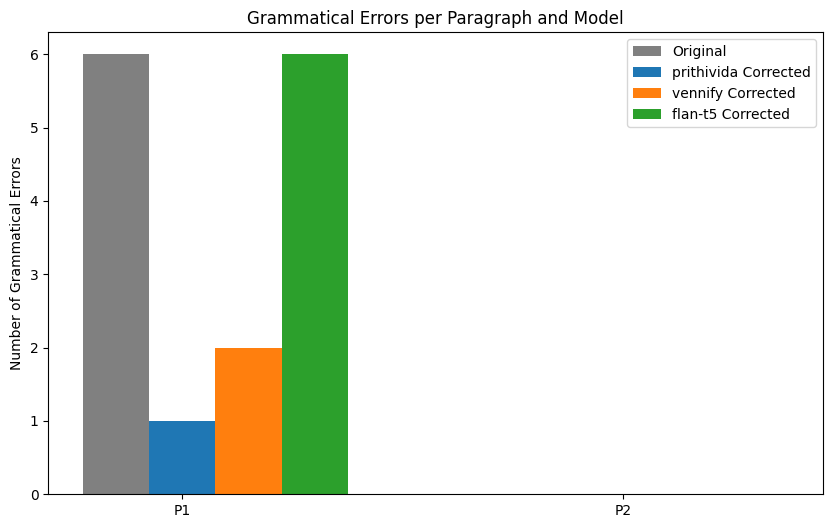

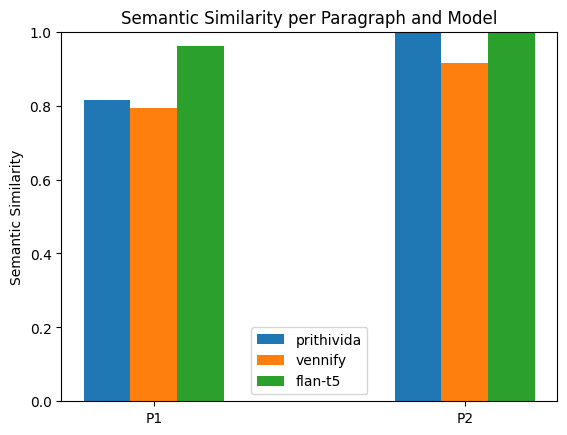

In [5]:
import evaluate

evaluate.graph_errors(models,paragraphs,result_text)
evaluate.graph_sematic(models,paragraphs,sematic_results)




        